# Read Titanic Data and print some information

In [1]:
import wget
url = 'https://gist.githubusercontent.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/ff414a1bcfcba32481e4d4e8db578e55872a2ca1/titanic.csv'
filename = wget.download(url)

100% [..............................................................................] 10305 / 10305

In [2]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
test_df = pd.read_csv("titanic.csv",sep='\t')
test_df.head() # print 5 data from top 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# print correlation data
test_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.192991,0.012208,0.075021,-0.136420,-0.027243,-0.027122
Survived,-0.192991,1.000000,-0.116340,-0.120416,-0.066943,0.039435,0.029343
Pclass,0.012208,-0.116340,1.000000,-0.362627,0.087420,0.016491,-0.607256
Age,0.075021,-0.120416,-0.362627,1.000000,-0.393500,-0.215169,0.024494
SibSp,-0.136420,-0.066943,0.087420,-0.393500,1.000000,0.399040,0.271997
Parch,-0.027243,0.039435,0.016491,-0.215169,0.399040,1.000000,0.254822
Fare,-0.027122,0.029343,-0.607256,0.024494,0.271997,0.254822,1.000000


In [4]:
# Print missing data in percentage form
total = test_df.isnull().sum().sort_values(ascending=False)
percent_1 = test_df.isnull().sum()/test_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,125,80.1
Age,30,19.2
Embarked,1,0.6
Fare,0,0.0
Ticket,0,0.0


In [5]:
# Print each colum name
test_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

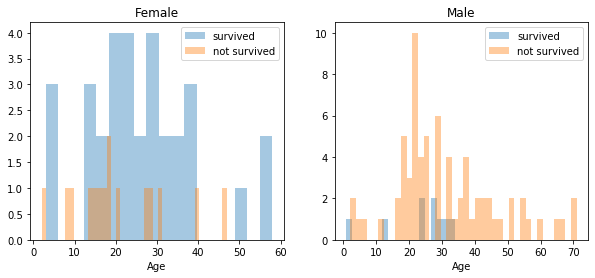

In [6]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = test_df[test_df['Sex']=='female']
men = test_df[test_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')
# Plot example data graph from survived

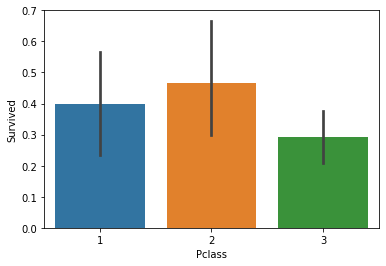

In [7]:
# plot bargraph from Pclass and survived data
sns.barplot(x='Pclass', y='Survived', data=test_df)

In [8]:
# Create new column name not_alone 
data = [test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
test_df['not_alone'].value_counts()
# test_df.columns.values

1    85
0    71
Name: not_alone, dtype: int64

## Clean Data & Filled Fake Data with "re" package

In [9]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)# we can now drop the cabin feature
test_df = test_df.drop(['Cabin'], axis=1)

In [10]:
data = [test_df]

for dataset in data:
    mean = test_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = test_df["Age"].astype(int)
test_df["Age"].isnull().sum()

0

In [11]:
test_df['Embarked'].describe()

count     155
unique      3
top         S
freq      110
Name: Embarked, dtype: object

In [12]:
common_value = 'S'
data = [test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 14 columns):
PassengerId    156 non-null int64
Survived       156 non-null int64
Pclass         156 non-null int64
Name           156 non-null object
Sex            156 non-null object
Age            156 non-null int32
SibSp          156 non-null int64
Parch          156 non-null int64
Ticket         156 non-null object
Fare           156 non-null float64
Embarked       156 non-null object
relatives      156 non-null int64
not_alone      156 non-null int32
Deck           156 non-null int32
dtypes: float64(1), int32(3), int64(6), object(4)
memory usage: 15.4+ KB


In [14]:
data = [test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [15]:
data = [test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
test_df = test_df.drop(['Name'], axis=1)

In [16]:
genders = {"male": 0, "female": 1}
data = [test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [17]:
test_df['Ticket'].describe()
test_df = test_df.drop(['Ticket'], axis=1)
ports = {"S": 0, "C": 1, "Q": 2}
data = [test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [18]:
test_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,1,0,3,0,22,1,0,7,0,1,0,8,1
1,2,1,1,1,38,1,0,71,1,1,0,3,3
2,3,1,3,1,26,0,0,7,0,0,1,8,2
3,4,1,1,1,35,1,0,53,0,1,0,3,3
4,5,0,3,0,35,0,0,8,0,0,1,8,1
5,6,0,3,0,23,0,0,8,2,0,1,8,1
6,7,0,1,0,54,0,0,51,0,0,1,5,1
7,8,0,3,0,2,3,1,21,0,4,0,8,4
8,9,1,3,1,27,0,2,11,0,2,0,8,3
9,10,1,2,1,14,1,0,30,1,1,0,8,3


In [19]:
test_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
relatives      0
not_alone      0
Deck           0
Title          0
dtype: int64

In [20]:
test_df[test_df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title


In [21]:
test_df.dtypes

PassengerId    int64
Survived       int64
Pclass         int64
Sex            int64
Age            int32
SibSp          int64
Parch          int64
Fare           int32
Embarked       int64
relatives      int64
not_alone      int32
Deck           int32
Title          int64
dtype: object

# Train & Test Data with Scikit Learn & XGBOOST

In [22]:
X_train = test_df.drop("Survived", axis=1)
Y_train = test_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

In [23]:
from sklearn.model_selection import train_test_split

train_df, post_test_df = train_test_split(
    test_df, 
    test_size=0.7,
    random_state=42)

print(train_df.shape)
print(post_test_df.shape)

(46, 13)
(110, 13)


In [24]:
train_df['Survived'].value_counts()

0    31
1    15
Name: Survived, dtype: int64

In [25]:
test_df['Survived'].value_counts()

0    102
1     54
Name: Survived, dtype: int64

In [26]:
post_test_df['Survived'].value_counts()

0    71
1    39
Name: Survived, dtype: int64

In [27]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

In [28]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [29]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

C:\Users\Sunat\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [30]:
# KNN 
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

In [31]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [32]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

C:\Users\Sunat\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [33]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

C:\Users\Sunat\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [34]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [35]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
100.00,Random Forest
100.00,Decision Tree
83.33,Logistic Regression
82.05,Support Vector Machines
81.41,Naive Bayes
74.36,KNN
66.03,Stochastic Gradient Decent
62.82,Perceptron


In [36]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.58823529 0.88235294 0.75       0.9375     0.86666667 0.73333333
 0.53333333 0.8        0.86666667 0.86666667]
Mean: 0.7824754901960785
Standard Deviation: 0.1260358488796208


In [37]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
PassengerId,0.180
Sex,0.165
Age,0.153
Title,0.150
Fare,0.123
Deck,0.045
SibSp,0.040
Pclass,0.039
Embarked,0.038


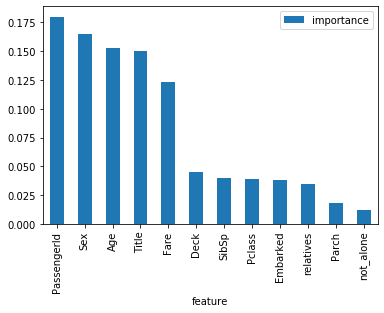

In [38]:
importances.plot.bar()

In [39]:
test_df  = test_df.drop("not_alone", axis=1)
test_df  = test_df.drop("Parch", axis=1)

In [40]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

100.0 %


In [41]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 80.77 %


In [42]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 80.77 %


In [43]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[85, 17],
       [24, 30]], dtype=int64)

In [44]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.6382978723404256
Recall: 0.5555555555555556


In [45]:
from sklearn.metrics import f1_score
f1_score(Y_train, predictions)

0.594059405940594

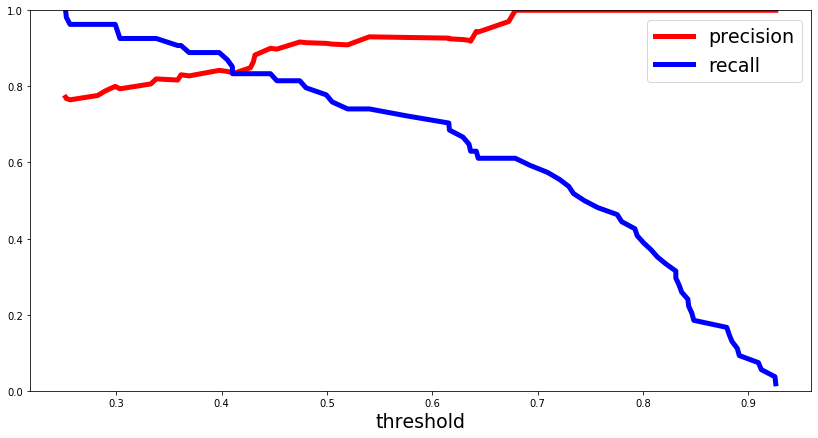

In [46]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

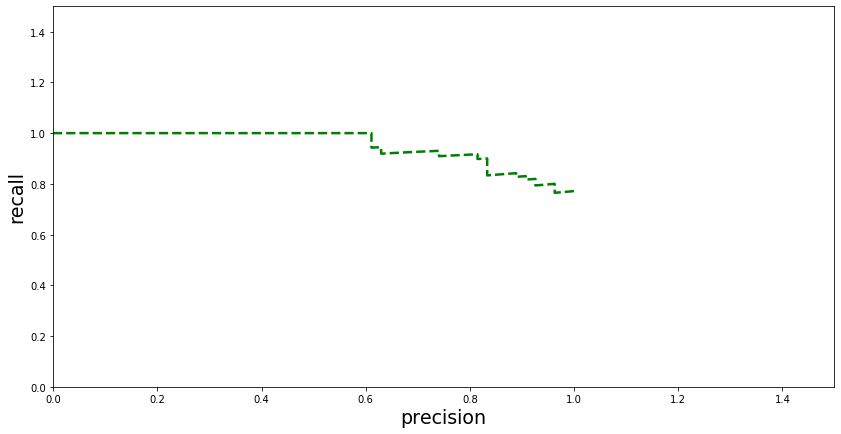

In [47]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

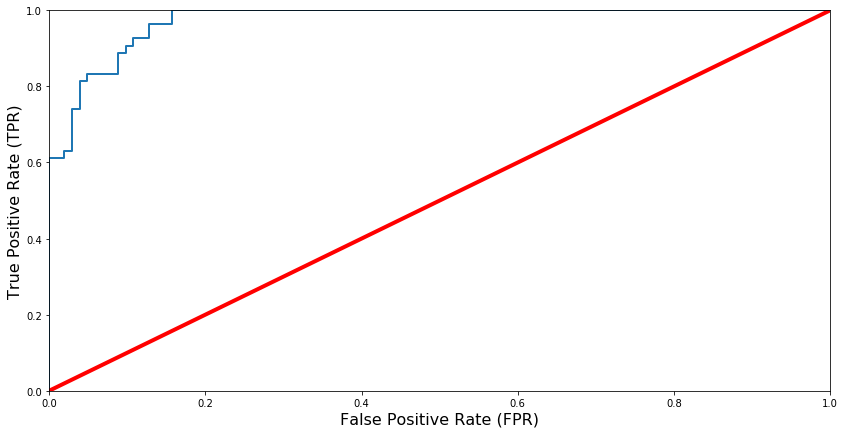

In [48]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [49]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9733115468409586


In [50]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

X = test_df[:len(test_df)]; new_X = test_df[len(test_df):]
y = test_df.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .7,random_state = 5,stratify = y)
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

rf.score(X_test, y_test)

C:\Users\Sunat\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.990909090909091

In [51]:
xgb = XGBClassifier()

In [52]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [53]:
xgb.score(X_train, y_train)

1.0

In [54]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

# Create the parameter grid: gbm_param_grid 
gbm_param_grid = {
    'n_estimators': range(8, 20),
    'max_depth': range(6, 10),
    'learning_rate': [.3, .35, .4, .45, .5],
    'colsample_bytree': [.6, .7, .8, .9, 1]
}

# Instantiate the regressor: gbm
gbm = XGBClassifier(n_estimators=10)

# Perform random search: grid_mse
xgb_random = RandomizedSearchCV(param_distributions=gbm_param_grid, 
                                    estimator = gbm, scoring = "accuracy", 
                                    verbose = 1, n_iter = 50, cv = 4)


# Fit randomized_mse to the data
xgb_random.fit(X, y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", xgb_random.best_params_)
print("Best accuracy found: ", xgb_random.best_score_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 4 folds for each of 50 candidates, totalling 200 fits
Best parameters found:  {'n_estimators': 18, 'max_depth': 7, 'learning_rate': 0.4, 'colsample_bytree': 0.7}
Best accuracy found:  1.0


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    4.2s finished
C:\Users\Sunat\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
